<a href="https://colab.research.google.com/github/davidfu0826/CNN_tutorial/blob/master/tutorial_ZARA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BASIC INFORMATION (ReadMe)
**1.  About Jupyter Notebook and Google Colab**
- Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning etc.
- Google Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. 

**2.   About this lab**

- In this lab we will explore and use Zalando's article images dataset called Fasion-MNIST. Each image in the dataset illustrates a certain article e.g. sneaker, T-shirt or dress.


- The goal is to classify the type of article given only the image. We will work mainly with the **convolutional neural network**. ML pipeline outlined in the theory part of the course will be followed. 


**3.  How to save own version of the Jupyter notebook**

- Go to File and choose "Save a copy in Drive". This will save your code notebook on your Google Drive.

**4.   How to run/execute cell of code**

- Alt 1: Ctrl+Enter tab through the code.
- Alt 2: Shift+Enter tab through the code.
- Alt 3:  Mark the cell,  press "Run" button on the left side of the cell.


**5.  More info about dataset**
 - Data source: https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/

 - Image labels in the dataset:
1. T-shirt/top
2. Trouser
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot
10. Pullover


#1) CLONE ENVIRONMENT & IMPORT LIBRARIES

##1.1. Get all the files
- Run the below code cell if the notebook is opened in Google Collab. It will clone the github repository to get all necessary files.

In [1]:
#!git clone https://github.com/NordAxon/AI-For-Leaders.git
!git clone https://github.com/davidfu0826/CNN_tutorial

fatal: destination path 'CNN_tutorial' already exists and is not an empty directory.


## 1.2 Import libraries
- ML with Python offers a great deal of libraries.
- Read about some of the most used: https://hackernoon.com/top-10-libraries-in-python-to-implement-machine-learning-12602cf5dc61
- Documentation about libs used in this lab:


> - Pandas: https://pandas.pydata.org/pandas-docs/stable/index.html <br>
> - Scikit-learn: https://scikit-learn.org/stable/ <br>
> - Keras: https://keras.io/

- Lets import all the libraries we need to run the code and perform the analysis. Run the below code cell.

In [2]:
import warnings
#warnings.simplefilter("ignore", UserWarning)
#warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", Warning)

# For downloading MNIST Zara fashion dataset
from tensorflow.keras.datasets import fashion_mnist

# For data visualization
import matplotlib.pyplot as plt
import numpy as np

from CNN_tutorial.utility_functions import load_example_image, visualize_convolution
#from skimage import io, color
#from skimage import exposure
#import pylab
#import skimage.measure

# Dimensionality reduction
from sklearn.decomposition import PCA

# Preprocessing
from tensorflow.keras.utils import to_categorical

# Machine learning model
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from CNN_tutorial.utility_functions import print_confusion_matrix

# 2) DOWNLOAD THE DATASET
- Usually a data scientist has to prepare the labeled image dataset beforehand, which might cost alot of money and time.
- Luckily for us, many common datasets e.g. MNIST digits, CIFAR10 and Fasion-MNIST are available directly through Machine Learning libraries. 
- We will use Keras API to directly download the Fasion-MNIST.

In [0]:
# Loading images
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# Size of the dataset (X, Y)
print ('Number of images and their dimensions: ' + str(train_images.shape))

Number of images and their dimensions: (60000, 28, 28)


# 3) DATA VISUALIZATION
In order to create a model which will classify the Zalando articles with great performance we need to determine the *complexity* of the problem firsthand. In other words, we need to understand the dataset and get to know it better.

## 3.1 Image visualization
- We start by visualize a subset of the images
- Run the following code section below

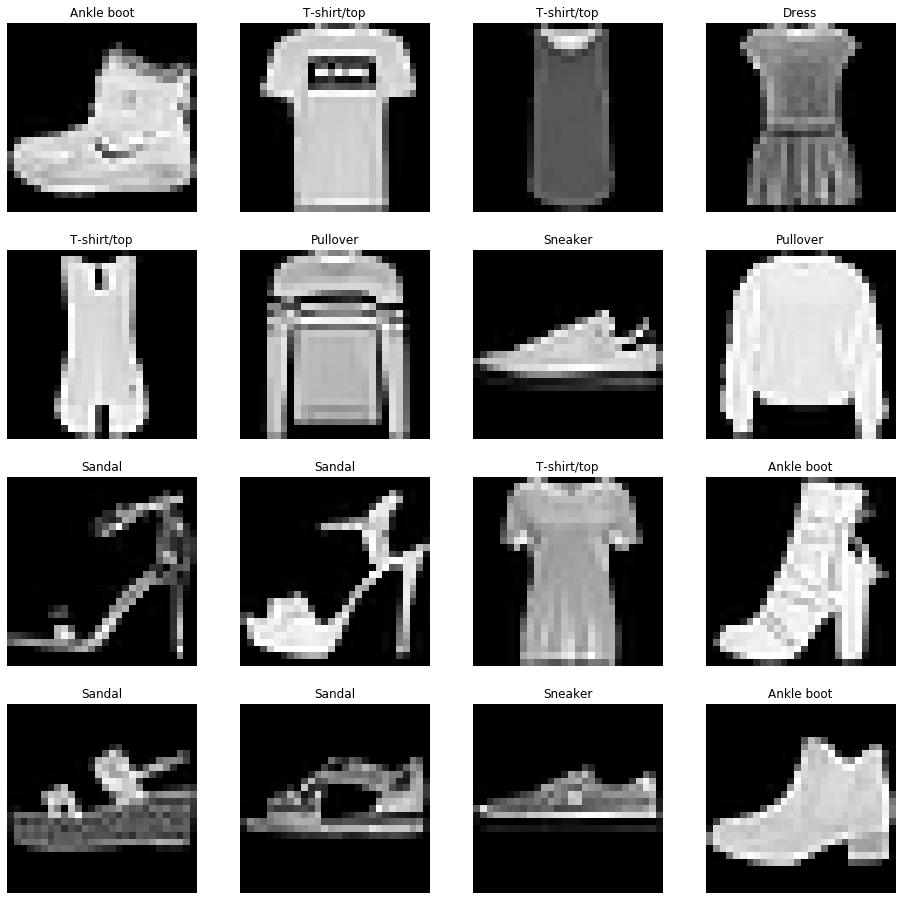

In [5]:
# Assigning each label to the corresponding index for visualization
label_to_article = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
    }

# Displaying images
fig, axs = plt.subplots(4, 4, figsize = (16, 16))
for i in range(16):
  image = train_images[i]
  grid_index = (i//4, i%4)
  axs[grid_index].imshow(image/255., cmap=plt.cm.gray)
  axs[grid_index].set_title(label_to_article[train_labels[i]])
  axs[grid_index].axis('off')
plt.show()

#TODO: Discuss what conclusion to be drawn from above plot
The Fasion-MNIST datasets contains 28x28 images 
#TODO: Historgram over number of images in each class maybe


## 3.2 Dimensionality reduction
- We would like to answer the question "*How complex is the dataset in terms of separability?*".
- One way to determine this is to use **dimensionality reduction**. 
  - In short, dimensionality reduction is a way to *compress* information/data.
  - There are many different approaches for this, e.g. *Principal Component Analysis (PCA)* and *T-distributed Stochastic Neighbor Embedding (t-SNE)*. 
  - We will use PCA to represent each image as a pair of coordinates **x** and **y**, in order to visualize it in a 2D-grid. 

- Run the following code section to perform dimensionality reduction on the Fasion-MNIST dataset.

- Note: **You neither have to understand the details of PCA nor the code below. Just observe the resulting figure* .

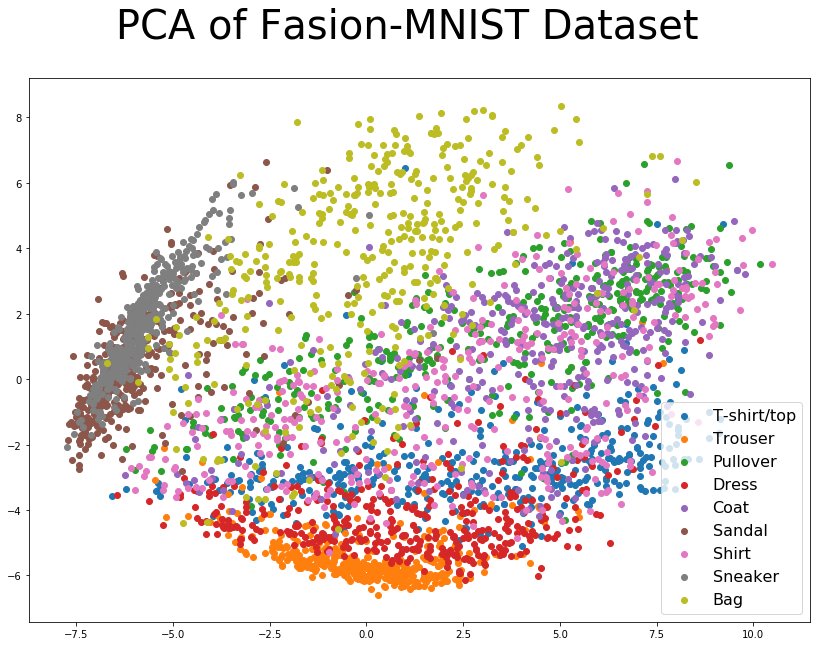

In [6]:
# Dimensionality reduction 
pca = PCA(n_components=2)
pca_train_images = pca.fit_transform(np.reshape(train_images/255., [-1, 28*28]))

# Colors for illustration
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig = plt.figure(figsize=(14, 10))
fig.suptitle('PCA of Fasion-MNIST Dataset', fontsize=40)

for i in range(9):
  # Select a subset of the images
  indices = np.where(train_labels == i)[0][:400]

  # Display images in a 2D grid
  plt.scatter(pca_train_images[indices][:,0], pca_train_images[indices][:,1])#, c=colors[i])
plt.legend([label_to_article[i] for i in range(9)], prop={'size': 16});

### ASSIGNMENT 1:

In this assignment you need to **observe the figure above** and **think through the following questions**:

- Sneakers and Sandals are more similar to each other in comparison to Sneakers and Trousers. Is it possible to conclude that from just looking at the Figure above?
- Are there other classes that are similar?
- Which classes **can be separated** by a straight line? 
- Which classes **cannot be separated** by a straight line?
- **Hint:** Which classes overlap each other? Which classes don't? What conclusions do you draw from that? 

## 3.3 Convolutions

- How does a model *know* that an image of a shoe is a shoe and not a T-shirt? One uses so called **features** to differentiate between different labels. For instance, one feature can be **the amount of horizontal lines** in an image. 

- For image classification, one can **extract features** by peforming a mathematical operation called **convolution** with the help of a **kernel** (sometimes called a **filter**).

![Imgur](https://i.imgur.com/op9Maqr.png)

- To illustrate this concept, run the following code to extract all the horizontal lines from an example image.


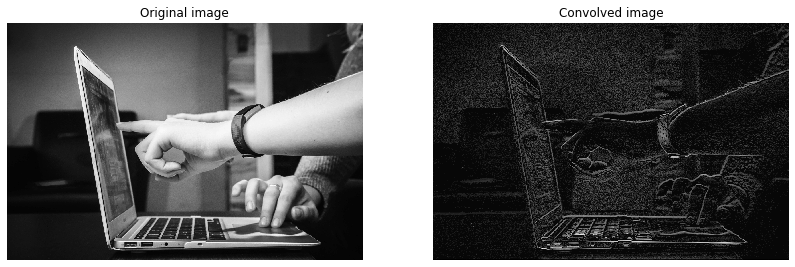

In [7]:
horizontal_line_conv = [[1, 1], 
                        [-1, -1]]
                        
example_image = load_example_image("CNN_tutorial/teaching.jpg") 
visualize_convolution(example_image, horizontal_line_conv)

### ASSIGNMENT 2:

In this assignment you need to edit the kernel by yourself.
- Instead of the horizontal line detector above, you will create a vertical line detector. **Edit the kernel** in the code cell below and run it.
- Hint: **Look at the horizontal line kernel and deduce how the vertical line kernel would look like. Try everything!*


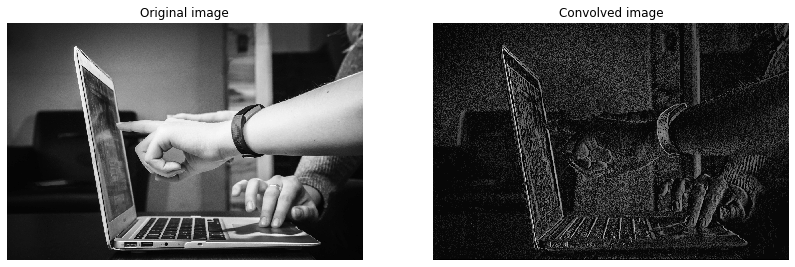

In [8]:
# EDIT KERNEL HERE (replace all underscores with numbers)
kernel = [[-1, 1], 
          [-1, 1]]

visualize_convolution(example_image, kernel)

### ASSIGNMENT 3:
In assignment 2 you used convolutions with 2x2 kernels. But it is also possible to use larger kernels such as 3x3 and 4x4. Even other shapes such as 2x3 are possible.

**Which of the following three sentences are true?**

- The larger the kernels are, we can capture more features.
- The smaller the kernels are, we can capture more features.
- The same amount of features can be captured by both large and small kernels.

### Final remark on convolutions
- So how do we determine what kernels/filters that are optimal for classifying ? **We don't**. 
- With the help of **gradient descent**, we can train a **convolutional neural network (CNN)** to automatically find good kernels/filters.

# 4) DATA PRE-PROCESSING
TODO: image values between 0-1 instead of 0 - 255 or hexagonal values because models uses it


In [0]:
normalized_train_images = train_images/255.
normalized_test_images = test_images/255.

# 5) MODEL TRAINING AND EVALUATION

## 5.1 Binary Classification: **Logistic Regression**




    0. "T-shirt/top",
    1. "Trouser",
    2. "Pullover",
    3. "Dress",
    4. "Coat",
    5. "Sandal",
    6. "Shirt",
    7. "Sneaker",
    8. "Bag",
    9. "Ankle boot"

#### Data preperation

In [0]:
index_of_first_class = 2
index_of_second_class = 4

# Select only the relevant images for training
def prepare_binary_dataset(images, labels, index_of_first_class, index_of_second_class):
  first_indices = np.where(labels == index_of_first_class)
  second_indices = np.where(labels == index_of_second_class)

  indices = np.hstack([first_indices, second_indices])[0]

  new_shape = (-1, 28*28) 
  X = np.reshape(images[indices], new_shape)
  y = labels[indices] == index_of_first_class

  return X, y

X_train, y_train = prepare_binary_dataset(normalized_train_images, train_labels, index_of_first_class, index_of_second_class)
X_test, y_test = prepare_binary_dataset(normalized_test_images, test_labels, index_of_first_class, index_of_second_class)

#### Model selection

In [0]:
# Creating model
linear_model = LogisticRegression()

#### Model training

In [15]:
# Training model
linear_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model evaluation

Accuracy with Logistic Regression 85.55%


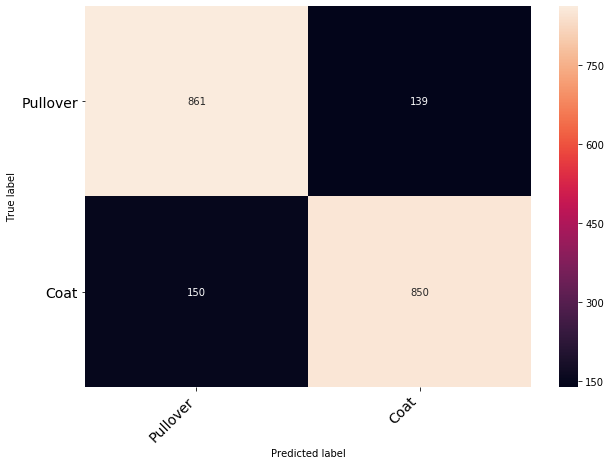

In [16]:
predictions = linear_model.predict(X_test)

test_accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy with Logistic Regression {100*test_accuracy}%")
data = confusion_matrix(y_test, predictions)

title_first_class = label_to_article[index_of_first_class]
title_second_class = label_to_article[index_of_second_class]
print_confusion_matrix(data, class_names=[title_first_class, title_second_class]);

### ASSIGNMENT 4:

## 5.2 Multiclass Classification: **Convolutional Neural Network**

#### Data preperation

In [0]:
# Keras expects 4D inputs, therefore we need to reshape our dataset from (-1, 28, 28) to (-1, 28, 28, 1)
new_shape = (-1, 28, 28, 1)
X_train = np.reshape(normalized_train_images, new_shape) 
X_test = np.reshape(normalized_test_images, new_shape) 

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

#### Model selection


In [0]:
inputs = Input(shape=(28, 28, 1))
x = Conv2D(64, (3,3), activation="relu")(inputs)
x = MaxPooling2D()(x)
x = Conv2D(64, (3,3), activation="relu")(inputs)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(64, activation="relu")(x)
outputs = Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

In [0]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#### Model training

In [42]:
history = model.fit(X_train, y_train)

Train on 60000 samples
60000/60000 [==============================] - 44s 731us/sample - loss: 0.4908 - acc: 0.8263


#### Model evaluation

In [0]:
predictions = model.predict(X_test)

Accuracy with Convolutional Neural Network 80.51%


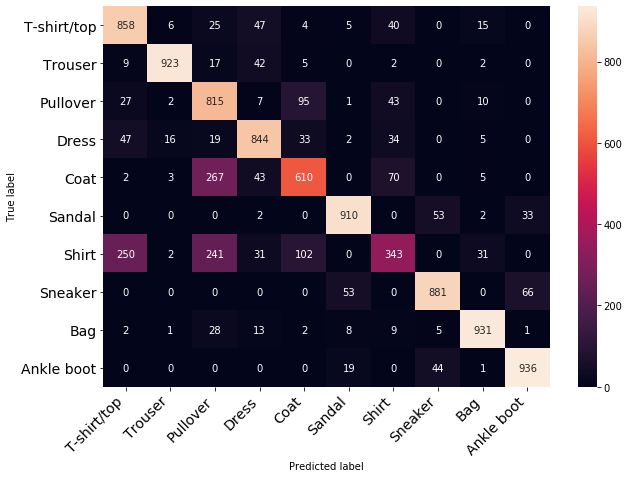

In [43]:
test_accuracy = accuracy_score(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(f"Accuracy with Convolutional Neural Network {100*test_accuracy}%")
data = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print_confusion_matrix(data, class_names=label_to_article.values());

In [0]:
# Idea: Display misclassified images. And discuss why it was misclassified.
# Idea: Plot a grid of all learned kernels

### ASSIGNMENT 5:

In [0]:
import shutil

shutil.rmtree('CNN_tutorial')